In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o ficheiro CSV
df = pd.read_csv("AIRPOL_data.csv", sep=';')

#Remover colunas desnecessárias
df = df.iloc[:, :8]

# Corrigir vírgulas em números europeus (por pontos)
df['Affected_Population'] = df['Affected_Population'].str.replace(",", ".").astype(float)
df['Populated_Area[km2]'] = df['Populated_Area[km2]'].str.replace(",", ".").astype(float)
df['Air_Pollution_Average[ug/m3]'] = df['Air_Pollution_Average[ug/m3]'].str.replace(",", ".").astype(float)
df['Value'] = df['Value'].str.replace(",", ".").astype(float)

# Verificar as dimensões do dataset
print("Dimensão do dataset:", df.shape)

# Mostrar um sumário estatístico
print(df.describe(include='all'))

# Ver as primeiras linhas
df.head()

# Verificar dados em falta
print(df.isnull().sum())

# Remover ou imputar valores nulos
df = df.dropna()

# Remover duplicados
df = df.drop_duplicates()

# Confirmar tipos
print(df.dtypes)

df.head()

# Listas de países por região
western = ['Austria', 'Belgium', 'France', 'Germany', 'Netherlands', 'Switzerland']
eastern = ['Poland', 'Czechia', 'Hungary']
southern = ['Greece', 'Spain', 'Italy', 'Portugal']
northern = ['Sweden', 'Denmark', 'Finland']

# Função para mapear
def get_region(country):
    if country in western:
        return 'Western Europe'
    elif country in eastern:
        return 'Eastern Europe'
    elif country in southern:
        return 'Southern Europe'
    elif country in northern:
        return 'Northern Europe'
    else:
        return 'Other'

# Aplicar ao dataset
df['Region'] = df['Country'].apply(get_region)

# Verificar agrupamento
df['Region'].value_counts()

df.head()

Dimensão do dataset: (49140, 8)
        Country NUTS_Code Air_Pollutant Outcome  Affected_Population  \
count     49140     49140         49140   49140         4.914000e+04   
unique       42      1755             3       6                  NaN   
top     Germany        BA         PM2.5  Asthma                  NaN   
freq      13224       116         29682   10254                  NaN   
mean        NaN       NaN           NaN     NaN         1.023692e+06   
std         NaN       NaN           NaN     NaN         9.085726e+06   
min         NaN       NaN           NaN     NaN         2.674000e+03   
25%         NaN       NaN           NaN     NaN         1.069040e+05   
50%         NaN       NaN           NaN     NaN         2.388280e+05   
75%         NaN       NaN           NaN     NaN         5.988800e+05   
max         NaN       NaN           NaN     NaN         4.680626e+08   

        Populated_Area[km2]  Air_Pollution_Average[ug/m3]          Value  
count          4.914000e+04 

,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value,Region
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0,Other


In [3]:
#1.

# Assumindo que df já foi carregado e pré-processado

# Definir doenças respiratórias
respiratory_diseases = ['Asthma', 'Chronic obstructive pulmonary disease']

# Criar novo atributo binário: 1 se for respiratória, 0 caso contrário
df['RespDisease'] = df['Outcome'].apply(lambda x: 1 if x in respiratory_diseases else 0)

# Verificar distribuição
print(df['RespDisease'].value_counts())

df.head()

RespDisease
0    29317
1    16223
Name: count, dtype: int64


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value,Region,RespDisease
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other,1
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other,1
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0,Other,1
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0,Other,1
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0,Other,1


Resultados da validação cruzada (5-fold):
Accuracy: 0.77 ± 0.00
Precision: 0.90 ± 0.04
Recall: 0.39 ± 0.02
F1: 0.55 ± 0.01


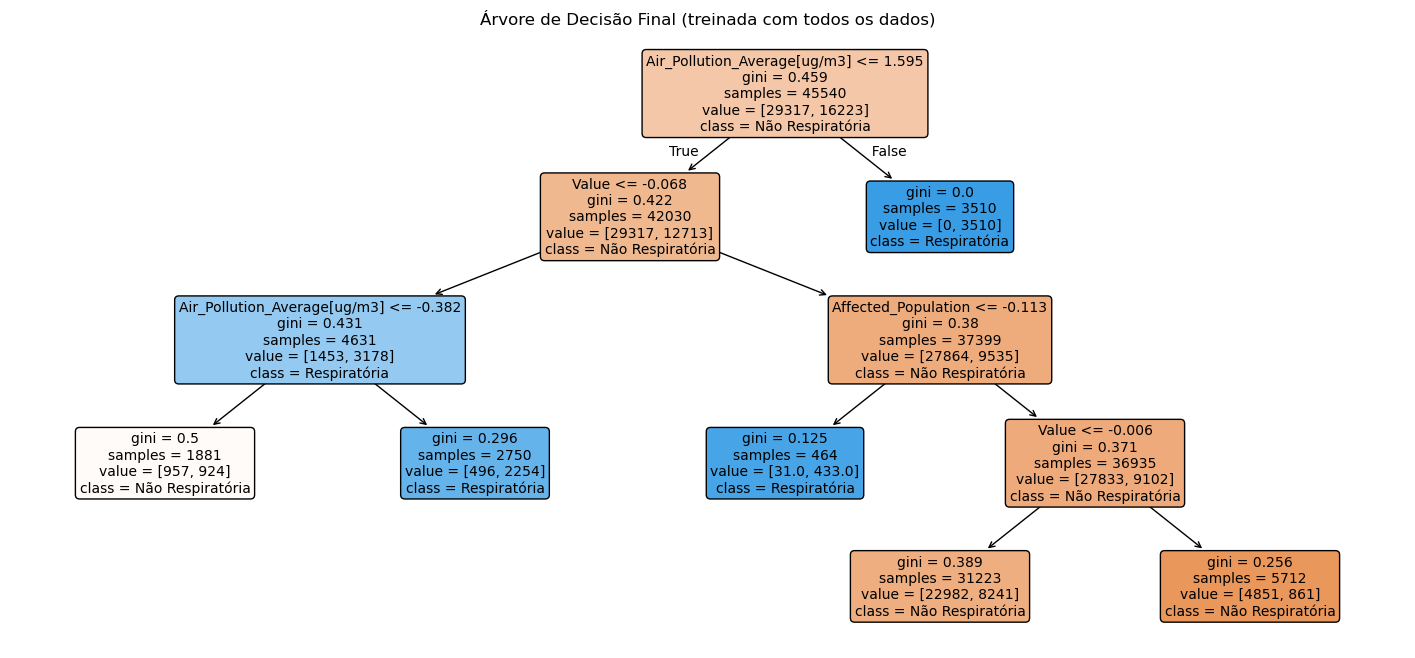


Matriz de Confusão (modelo final):


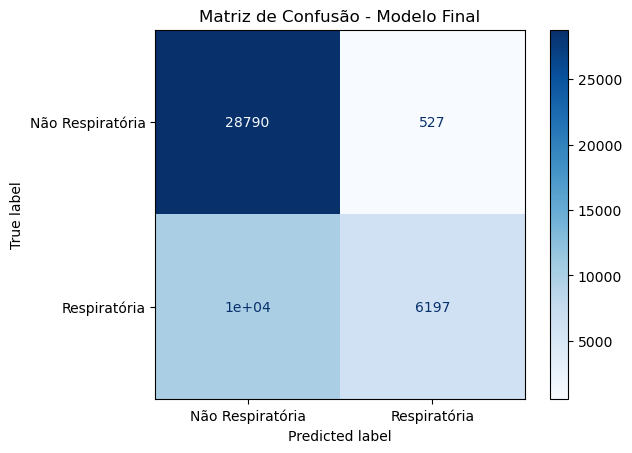

Relatório de Classificação (modelo final):
                  precision    recall  f1-score   support

Não Respiratória       0.74      0.98      0.85     29317
    Respiratória       0.92      0.38      0.54     16223

        accuracy                           0.77     45540
       macro avg       0.83      0.68      0.69     45540
    weighted avg       0.81      0.77      0.74     45540

Precisão (classe Respiratória): 0.92
Sensibilidade/Recall (classe Respiratória): 0.38


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Features e alvo
features = ['Air_Pollution_Average[ug/m3]', 'Affected_Population', 'Populated_Area[km2]', 'Value']
X = df[features]
y = df['RespDisease']

# Pipeline com normalização e árvore de decisão
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(max_leaf_nodes=6, random_state=42))
])

# Validação cruzada estratificada com 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar com múltiplas métricas
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, return_estimator=True)

# Mostrar resultados médios e desvio padrão
print("Resultados da validação cruzada (5-fold):")
for metric in scoring:
    mean = cv_results[f'test_{metric}'].mean()
    std = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean:.2f} ± {std:.2f}")

# Treinar modelo final com todos os dados para visualização da árvore
final_pipeline = pipeline.fit(X, y)
final_model = final_pipeline.named_steps['clf']

# Visualizar a árvore treinada final
plt.figure(figsize=(18, 8))
plot_tree(final_model,
          feature_names=features,
          class_names=['Não Respiratória', 'Respiratória'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão Final (treinada com todos os dados)")
plt.show()

# Fazer previsões com o modelo final (opcional — aqui só para avaliação simples)
y_pred_final = final_pipeline.predict(X)

# Matriz de Confusão e Relatório
print("\nMatriz de Confusão (modelo final):")
cm = confusion_matrix(y, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Respiratória', 'Respiratória'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Modelo Final')
plt.grid(False)
plt.show()

# Relatório de classificação
print("Relatório de Classificação (modelo final):")
print(classification_report(y, y_pred_final, target_names=['Não Respiratória', 'Respiratória']))

# Precisão e Sensibilidade
precision = round(precision_score(y_true=y, y_pred=y_pred_final, pos_label=1), 2)
recall = round(recall_score(y_true=y, y_pred=y_pred_final, pos_label=1), 2)
print("Precisão (classe Respiratória):", precision)
print("Sensibilidade/Recall (classe Respiratória):", recall)
